<div id="titre">
<h1 style="color:white;
  font-family:Comic Sans MS;
  font-size:3em;
  background-color:#F0573B;
  text-align:center;
  padding:10px">Par Osiris et par Apis, tu fais maintenant du machine learning </h1>
<div style="font-family:Comic Sans MS; background-color:black;box-shadow: 8px 8px 0px #aaa; text-align:center; width: 50%; color:white">TP  - Statitique</div>
</div>

En 1936, le biologiste américain <b>Edgar Anderson</b> a collecté les données sur 3 espèces d'iris :
<table style="border-width:10px;border-style:solid;border-color:white;border-collapse:collapse;" width="700">
   <tr style="border:2px solid black;">
       <td style="border:2px solid black;text-align:center;border-color:white"><img src=iris_setosa.jpeg width='200'></td>
       <td style="border:2px solid black;text-align:center;border-color:white"><img src=iris_versicolor.jpeg width='200'></td>
       <td style="border:2px solid black;text-align:center;border-color:white"><img src=iris_virginica.jpeg width='200'></td>
   </tr>
    <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;border-color:white"><b>Setosa</b></td>
        <td style="border:2px solid black;text-align:center;border-color:white"><b>Versicolor</b></td>
        <td style="border:2px solid black;text-align:center;border-color:white"><b>Virginica</b></td>
   </tr>
</table>
Pour chaque iris étudié, Anderson a mesuré (en cm) ses dimensions. 

Chaque ligne du fichier <code>'iris.csv'</code> correspond aux résultats d'un iris :
<ul>
    <li><code>x</code> : longueur de son pétale</li>
    <li><code>y</code> : largeur de son pétale</li>
    <li><code>variété</code> : nom de sa variété</li>
</ul>
<br>
<b><u>Objectifs</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
    <ul>
        <li>Etudier ce jeu de données et apprendre à la machine à reconnaître des iris <b>Setosa</b>, <b>Versicolor</b> et <b>Virginica</b>.
        </li>
        <li>Prédire la variété d'un nouvel iris à partir de ses dimensions en recherchant ses voisins les plus proches ! 
            <span style='color:red;background-color:orange'><b>Bienvenue dans le monde du machine learning et de l'intelligence artificielle !</b></span>
        </li>
    </ul>
</blockquote>

<h1 style="color:white;background-color:black;text-align:center"> Partie A : ouverture avec Python</h1>

In [1]:
import pandas
import pylab as pl
pl.style.use('bmh')

from seaborn import boxplot, pairplot

T = pandas.read_csv('iris_elv.csv')
T.head()

,x,y,variété
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


<h1 style="color:white;background-color:black;text-align:center"> Partie B : Comparaisons puis normalisation des variables statistiques<code>x</code> et <code>y</code></h1>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Moyennes et écarts-types

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Pour calculer la moyenne et l'écart-type de <code>'x'</code>, exécuter :

In [2]:
m1 = T['x'].mean()
s1 = T['x'].std()
m1 , s1

(3.7580000000000005, 1.7652982332594662)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Calculer la moyenne et l'écart-type de <code>'y'</code>

In [3]:
m2 = T['y'].mean()
s2 = T['y'].std()
m2 , s2

(1.1993333333333336, 0.7622376689603465)

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Normalisation des colonnes

<b><u>Définitions</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
    <ul>
        <li>Soit $x$ la longueur d'un iris.
            <br>Sa valeur <b>normalisée</b> par rapport aux autres longueurs de <code>'x'</code> est : $$\boxed{\dfrac{x - m1}{s1}}.$$
            <i style='color:yellow'>C'est l'écart à la moyenne $m1$ compté en écart-type $s1$.</i>
        </li>
        <br>
        <li>Soit $y$ la largeur d'un iris.
            <br>Sa valeur <b>normalisée</b> par rapport aux autres largeurs de <code>'y'</code> est : $$\boxed{\dfrac{y - m2}{s2}}.$$
            <i style='color:yellow'>C'est l'écart à la moyenne $m2$ compté en écart-type $s2$</i>.
        </li>
    </ul>
</blockquote>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer la valeur normalisée de $1,4$ par rapport aux longueurs contenues <code>x</code> :

In [4]:
(1.4 - m1)/s1

-1.3357516342415203

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Soit la fonction nommée <code>norm</code> de paramètres :
<ul>
    <li><code>valeur</code> <i>(une valeur)</i></li>
    <li><code>moy</code> <i>(la moyenne des valeurs de la série statistique)</i></li>
    <li><code>sig</code> <i>(l'écart-type des valeurs de la série statistique)</i></li>
</ul>
Elle renvoie sa valeur normalisée par rapport à une colonne de moyenne <code>moy</code> et d'écart-type <code>sig</code>.
<br> Compléter les pointillés de cette fonction.

In [5]:
def norm(valeur,moy,sig):
    return (valeur - moy)/sig

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Pour normaliser chaque valeur de <code>'x'</code>, exécuter :

In [6]:
norm(T['x'],m1,s1)

0     -1.335752
1     -1.335752
2     -1.392399
3     -1.279104
4     -1.335752
         ...   
145    0.816859
146    0.703564
147    0.816859
148    0.930154
149    0.760211
Name: x, Length: 150, dtype: float64

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Compléter les instructions suivantes pour obtenir les valeurs normalisées de <code>'x'</code> dans une nouvelle colonne de <code>T</code> nommée <code>x_norm</code>.
<br> Faire de même pour <code>'y'</code>.

In [7]:
T['x_norm'] = norm(T['x'],m1,s1)
T['y_norm'] = norm(T['y'],m2,s2)
T.head()

,x,y,variété,x_norm,y_norm
0,1.4,0.2,Setosa,-1.335752,-1.311052
1,1.4,0.2,Setosa,-1.335752,-1.311052
2,1.3,0.2,Setosa,-1.392399,-1.311052
3,1.5,0.2,Setosa,-1.279104,-1.311052
4,1.4,0.2,Setosa,-1.335752,-1.311052


<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> Exécuter le code suivant qui permet de représenter les boîtes à moustaches de <code>'x'</code>, <code>'x_norm'</code>, <code>'y'</code> et <code>'y_norm'</code>.

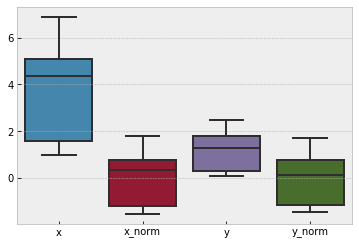

In [8]:
boxplot(data=T,whis='range', order=['x','x_norm','y','y_norm'])

<ol>
    <li> Les valeurs de <code>'x'</code> et celles de <code>'y'</code> se répartissent-elles de la même façon ? <i>(oui ou non)</i></li>
    <li> Les valeurs de <code>'x_norm'</code> et celles de <code>'y_norm'</code> se répartissent-elles de la même façon ? <i>(oui ou non)</i></li>
    <li> Dans quel intervalle se répartissent les valeurs normalisées de <code>'x'</code> et de <code>'y'</code> ? </li>
</ol>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>e.</span> En exécutant le code suivant, que devient la moyenne et l'écart-type de valeurs normalisées ?  

In [9]:
T.describe().query('index in ["mean","std"]')

,x,y,x_norm,y_norm
mean,3.758000,1.199333,-2.842171e-16,-3.789561e-16
std,1.765298,0.762238,1.000000e+00,1.000000e+00


<h1 style="color:white;background-color:black;text-align:center"> Partie C : Prédire l'espèce d'un nouvel iris</h1>

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
Un nouvel iris a pour dimensions : 
    <ul>
        <li>$2$ cm de longueur</li>
        <li>$0.5$ cm de largeur </li>
    </ul>
    Nous souhaitons <b>prédire</b> le nom de sa variété d'iris.
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Nuage de points des iris

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Pour chaque iris, on représente sa <b>largeur normalisée</b> en fonction de sa </b>longueur normalisée</b>, <b>selon sa variété</b>. 
<br> Exécuter le code suivant.

<IPython.core.display.Javascript object>


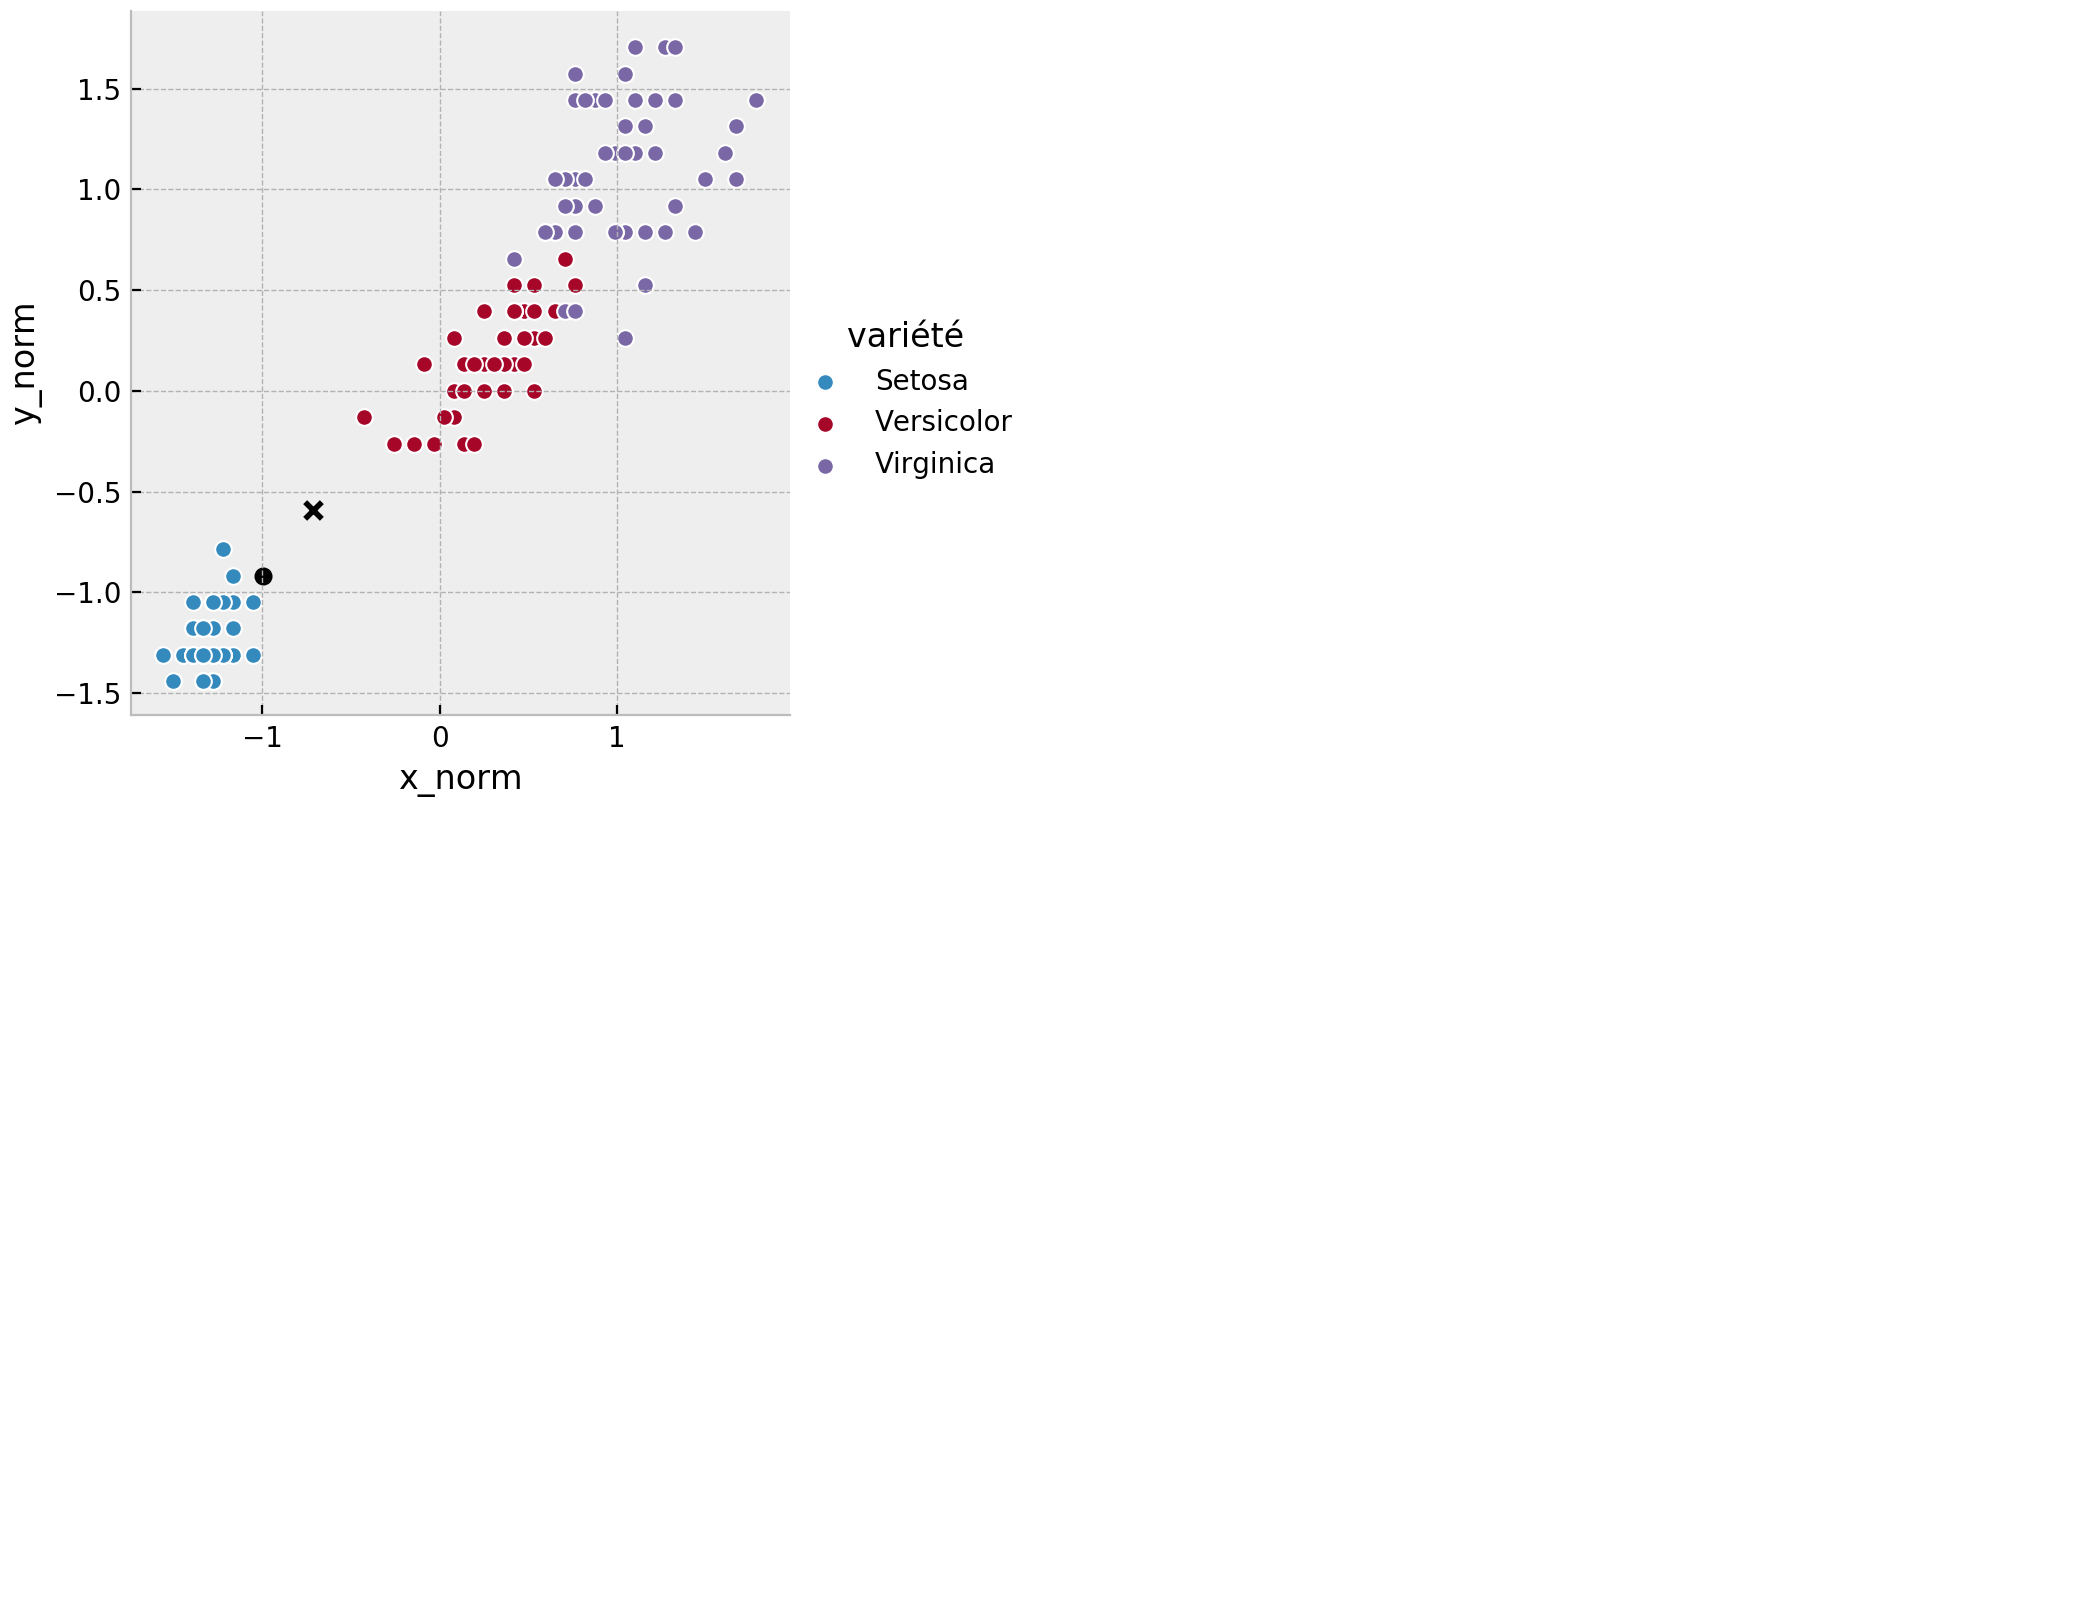

In [10]:
%matplotlib notebook

pairplot(x_vars='x_norm', y_vars='y_norm',
         data=T, hue='variété', height=4)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Calculer : 
<ul>
    <li><code>xn</code> la longueur normalisée du nouvel iris</li>
    <li><code>xn</code> sa largeur normalisée du nouvel iris</li>
</ul>

In [11]:
xn, yn = norm(2,m1,s1), norm(0.5,m2,s2)
xn , yn

(-0.9958657222207773, -0.9174741183903817)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Pour placer dans le nuage de points précédent, le point associé au nouvel iris, exécuter le code suivant :

In [12]:
pl.scatter(xn, yn, color='black')

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Quelle serait la variété de ce nouvel iris ?

<h1 style="color:white;background-color:black;text-align:center"> Partie D : Prédire le nom de la variété d'un nouvel iris</h1>

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
Un nouvel iris a pour dimensions : 
    <ul>
        <li>$2,5$ cm de longueur</li>
        <li>$0.75$ cm de largeur </li>
    </ul>
    Nous souhaitons <b>prédire</b> le nom de sa variété d'iris.
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Calculer : 
<ul>
    <li><code>xn</code> la longueur normalisée du nouvel iris</li>
    <li><code>xn</code> sa largeur normalisée du nouvel iris</li>
</ul>

In [13]:
xn, yn = norm(2.5,m1,s1), norm(0.75,m2,s2)
xn, yn 

(-0.7126274622034914, -0.589492426878091)

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Pour représenter ce nouvel iris par-dessus le nuage de points précédents, exécuter le code suivant :

In [14]:
pl.scatter(xn, yn, color='k', marker='x')

<b><u>Notation</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
On nomme le point obtenu $I($<code>xn</code>$\,;\,$<code>yn</code>$)$ correspondant à ce nouvel iris !
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>3.</span> Iris les plus "proches"

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> A partir de <code>T</code>, on sélectionne les iris de longeur $x=3,5$ cm et de longeur $y=1$ cm.

In [15]:
T.query('x == 3.5 and y == 1')

,x,y,variété,x_norm,y_norm
60,3.5,1.0,Versicolor,-0.146151,-0.261511
79,3.5,1.0,Versicolor,-0.146151,-0.261511


<span style='background-color:lightgreen;padding:10px'><b>Indication :</b> utiliser un des connecteurs <code>and</code>, <code>or</code>. </span>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Citer la ou les variétés obtenues ?

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Calculer :
<ul>
    <li><code>xna</code> la longueur normalisée de $3,5$</li>
    <li><code>yna</code> la largeur normalisée de $1$</li>
</ul>

In [16]:
xna, yna = norm(3.5,m1,s1), norm(1,m2,s2)
xna, yna 

(-0.14615094216891975, -0.2615107353658002)

<b><u>Notation</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
On nomme le point obtenu $A($<code>xna</code>$\,;\,$<code>yna</code>$)$ correspondant à cet iris !
</blockquote>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> Calculer "à la main" ou dans la cellule ci-dessous, la distance entre $I$ et $A$ :

In [17]:
((xna-xn)**2+(yna-yn)**2)**0.5

0.6545743943340144

<span style='background-color:lightgreen;padding:10px'><b>Indication :</b> $\sqrt{x}$ peut-être calculée avec python avec l'instruction : <code>x**0.5</code></span>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>e.</span> Compléter la fonction nommée <code>distance</code> de paramètres : 
<ul>
    <li><code>xa</code> et <code>ya</code> : l'abscisse et l'ordonnée d'un point $A$ <i>(dans un repère orthonormé)</i></li>
    <li><code>xb</code> et <code>yb</code> : l'abscisse et l'ordonnée d'un point $B$ <i>(dans un repère orthonormé)</i></li>
</ul>
Elle renvoie la distance entre $A$ et $B$.

In [18]:
def distance(xa,ya,xb,yb):
    d = (xa - xb)**2 + (ya - yb)**2
    return d**0.5

<span style='background-color:lightgreen;padding:10px'><b>Indication :</b> $\sqrt{x}$ peut-être calculée avec python avec l'instruction : <code>x**0.5</code></span>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>f.</span> Pour appliquer la distance de $I$ à chaque point du nuage, exécuter :

In [19]:
distance(xn,yn,T['x_norm'],T['y_norm'])

0      0.953379
1      0.953379
2      0.991332
3      0.917357
4      0.953379
         ...   
145    2.544484
146    2.069256
147    2.242460
148    2.614154
149    2.016637
Length: 150, dtype: float64

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>g.</span> On ajoute à <code>T</code> cette colonne sous le nom <code>'d'</code>, exécuter :

In [20]:
T['d'] = distance(xn,yn,T['x_norm'],T['y_norm'])
T.head()

,x,y,variété,x_norm,y_norm,d
0,1.4,0.2,Setosa,-1.335752,-1.311052,0.953379
1,1.4,0.2,Setosa,-1.335752,-1.311052,0.953379
2,1.3,0.2,Setosa,-1.392399,-1.311052,0.991332
3,1.5,0.2,Setosa,-1.279104,-1.311052,0.917357
4,1.4,0.2,Setosa,-1.335752,-1.311052,0.953379


<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>h.</span> Pour trier la table <code>T</code> en rangeant par ordre croissant les valeurs de <code>'d'</code>, exécuter : 

In [21]:
T.sort_values('d').head(5)

,x,y,variété,x_norm,y_norm,d
98,3.0,1.1,Versicolor,-0.429389,-0.130318,0.539504
43,1.6,0.6,Setosa,-1.222456,-0.786281,0.546490
57,3.3,1.0,Versicolor,-0.259446,-0.261511,0.559415
93,3.3,1.0,Versicolor,-0.259446,-0.261511,0.559415
23,1.7,0.5,Setosa,-1.165809,-0.917474,0.559415


<span style='background-color:lightgreen;padding:10px'><b>Indication :</b> <code>sort_values(col)</code> trie par ordre croissant une table selon une colonne <b>col</b></span>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Quelle serait la variété de nouvel iris ?

<h1 style="color:white;background-color:black;text-align:center"> Partie E : nouvelle prédiction</h1>

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
Un nouvel iris a pour dimensions : 
    <ul>
        <li>$4,7$ cm de longueur</li>
        <li>$1,7$ cm de largeur </li>
    </ul>
    Nous souhaitons <b>prédire</b> le nom de sa variété d'iris.
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> En réutilisant ce qui précède, prédire la variété de cet iris.

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
    Nous souhaitons <b>automatiser</b> la <b>prédiction</b> du nom de la variété d'iris cherché.
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Compléter la fonction nommée <code>nom</code> de paramètre <code>col</code> <i>(la colonne d'une table contenant des noms d'espèces d'iris)</i>.
<br> Elle renvoie le nom de la variété d'iris la plus citée.

In [22]:
def nom(col):
    Ver, Vir, Set = 0, 0, 0
    for x in col:
        if x == 'Versicolor':
            Ver = Ver + 1
        elif x == 'Virginica':
            Vir = Vir + 1
        elif x == 'Setosa':
            Set = Set + 1 
    if Ver == max(Ver,Vir,Set):
        return 'Versicolor'
    elif Vir == max(Ver,Vir,Set):
        return 'Virginica'
    elif Set == max(Ver,Vir,Set):
        return 'Setosa'

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>3.</span> Compléter la fonction nommée <code>prediction</code> de paramètres :
<ul>
    <li><code>x</code> : la longueur d'un nouvel iris <i>(que l'on souhaite prédire le nom variété d'iris</i>)</li>
    <li><code>y</code> : sa largeur </li>
</ul>
<br> Elle renvoie le nom de sa variété d'iris.

In [23]:
def prediction(x,y):
    xn, yn = norm(x,m1,s1), norm(y,m2,s2)
    T['d'] = distance(xn,yn,T['x_norm'],T['y_norm'])
    T1 = T.sort_values('d').head(5)
    return nom(T1['variété'])

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>4.</span> Tester la fonction <code>prediction</code> pour un iris de longueur $5$ cm et de largeur $1,4$ cm.

In [24]:
prediction(5,1.4)

'Versicolor'

In [25]:
prediction(4.7,1.7)

'Virginica'